# Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math 
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Data

In [2]:
stock_data = pd.read_csv('NSE-TATAGLOBAL.csv')
stock_data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
stock_data = stock_data.set_index('Date')
stock_data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2+ KB


In [5]:
stock_data.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2+ KB


In [7]:
stock_data.head().describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000
mean,235.09000,237.740000,231.310000,234.510000,234.130000,3.233312e+06,7554.870000
std,2.78644,1.754067,0.933006,1.123833,1.172924,1.145635e+06,2665.093118
min,233.30000,235.950000,230.200000,233.500000,233.250000,2.240909e+06,5248.600000
25%,233.55000,236.750000,230.750000,233.800000,233.300000,2.349368e+06,5503.900000
50%,234.05000,236.800000,231.100000,234.000000,233.750000,3.069914e+06,7162.350000
75%,234.55000,239.200000,232.000000,235.000000,234.250000,3.423509e+06,7999.550000
max,240.00000,240.000000,232.500000,236.250000,236.100000,5.082859e+06,11859.950000


<AxesSubplot:xlabel='Date'>

<Figure size 1008x504 with 0 Axes>

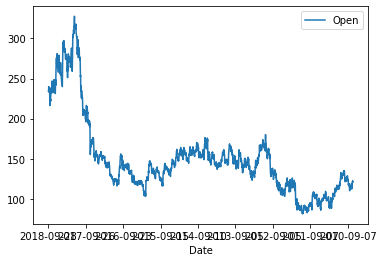

In [8]:
open = stock_data[['Open']]
plt.figure(figsize=(14,7))
open.plot()

# Data Visualization

In [9]:
open_values = open.values

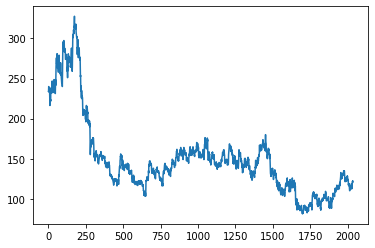

In [10]:
plt.plot(open_values)

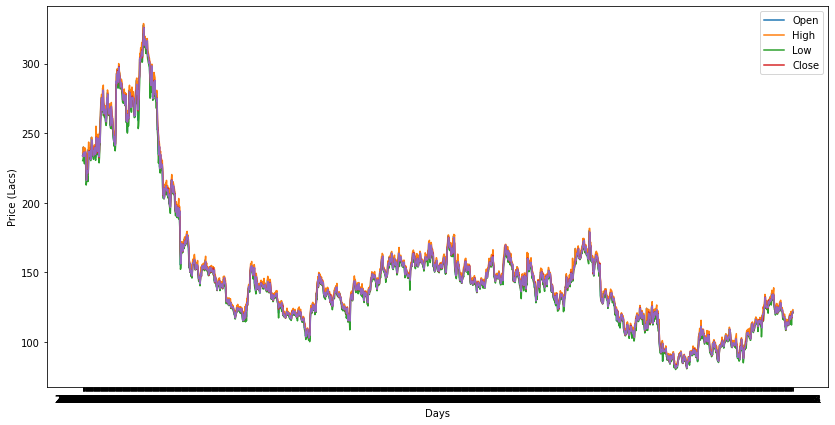

In [11]:
plt.figure(figsize=(14,7))
plt.plot(stock_data['Open'])
plt.plot(stock_data['High'])
plt.plot(stock_data['Low'])
plt.plot(stock_data['Last'])
plt.plot(stock_data['Close'])

plt.legend(['Open','High','Low','Close'], loc='upper right')

plt.xlabel('Days')
plt.ylabel('Price (Lacs)')

plt.show()

Text(0, 0.5, 'Turnover')

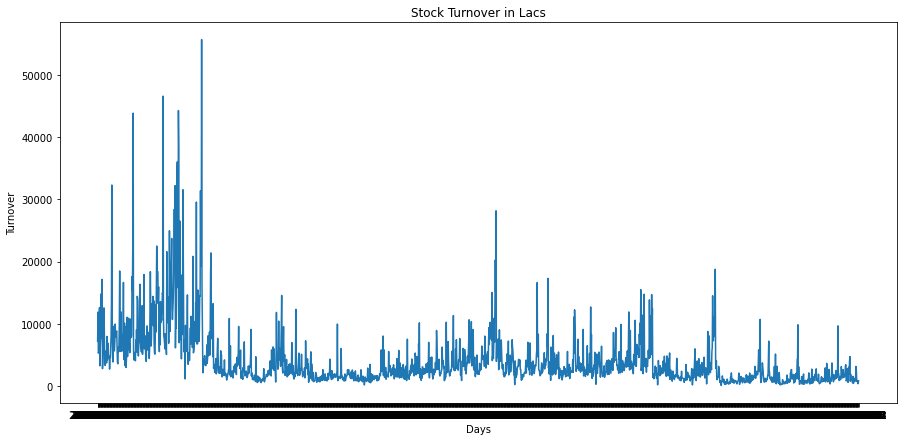

In [12]:
plt.figure(figsize=(15,7))
plt.plot(stock_data['Turnover (Lacs)'])

plt.title('Stock Turnover in Lacs')
plt.xlabel('Days')
plt.ylabel('Turnover')

## Correlations

<AxesSubplot:>

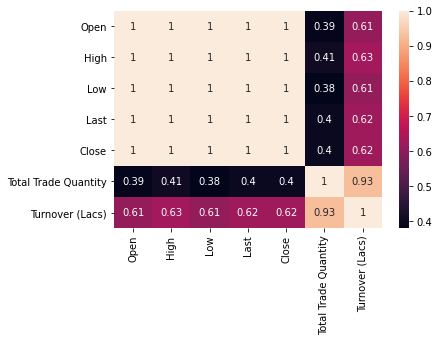

In [13]:
data_corr = stock_data.corr()
sns.heatmap(data_corr, annot=True)

# Feature Scaling

## We need to scale our data for optimal performance.

In [14]:
# Using MinMaxScaler to normalize the data between 0 & 1. 

scaler = MinMaxScaler()
open_values_scaled = scaler.fit_transform(np.array(open_values).reshape(-1,1))

In [15]:
len(open_values_scaled), len(open_values)

(2035, 2035)

In [16]:
# The training size should be 65% of the total length of the data frame.
training_size = int(len(open_values_scaled)*0.75)
test_size = len(open_values_scaled) - training_size

In [17]:
train_data, test_data = open_values_scaled[0:training_size,:], open_values_scaled[training_size:len(open_values_scaled),:1]

In [18]:
len(train_data), len(test_data)

(1526, 509)

# Preprocessing

In [19]:
# Creating dataset in time series for LSTM model
import numpy
def create_dataset(dataset, time_step):
    x_data, y_data = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        x_data.append(a)
        y_data.append(dataset[i+time_step, 0])
    return numpy.array(x_data), numpy.array(y_data)

In [20]:
# Taking 100 days price as one record for training
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [21]:
x_train.shape, y_train.shape

((1425, 100), (1425,))

In [22]:
x_test.shape, y_test.shape

((408, 100), (408,))

## LSTM

### we should always reshape our X train in 3-D

In [23]:
# Reshaping the model to fit into LSTM Model.

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [24]:
# Creating the LSTM Model using keras.

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
lstm_model.add(LSTM(50, return_sequences=True))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1, activation='linear'))

In [25]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
lstm_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose='auto')

Epoch 1/100
23/23 [==============================] - 12s 270ms/step - loss: 0.0202 - val_loss: 0.0066
Epoch 2/100
23/23 [==============================] - 4s 193ms/step - loss: 0.0021 - val_loss: 8.2769e-04
Epoch 3/100
23/23 [==============================] - 5s 210ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 5s 231ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/100
23/23 [==============================] - 5s 220ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/100
23/23 [==============================] - 5s 220ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/100
23/23 [==============================] - 5s 221ms/step - loss: 0.0013 - val_loss: 8.7896e-04
Epoch 8/100
23/23 [==============================] - 5s 222ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/100
23/23 [==============================] - 5s 221ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/100
23/23 [==============================] - 5s 221ms/step - loss: 0.0012

### Plotting Loss

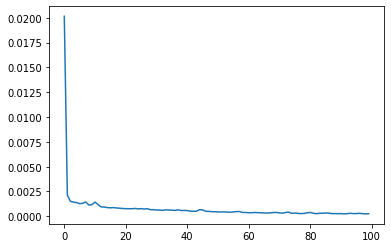

In [28]:
# The graph shows that the loss has decresed significantls and the model is trained well. 
loss = lstm_model.history.history['loss']
plt.plot(loss)

In [29]:
# Predicting Train and Test data.

predict_train = lstm_model.predict(x_train)
predict_test = lstm_model.predict(x_test)

In [30]:
# Applying Inverse Transforn to get the actual values. 

predict_train = scaler.inverse_transform(predict_train)
predict_test = scaler.inverse_transform(predict_test)

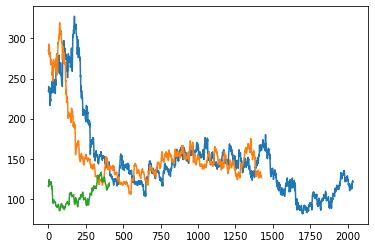

In [31]:
plt.plot(scaler.inverse_transform(open_values_scaled))
plt.plot(predict_train)
plt.plot(predict_test)

In [32]:
test = np.vstack((predict_train, predict_test))

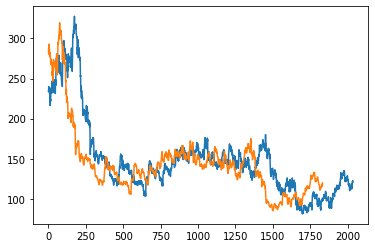

In [33]:
# Combinging the predicted data tp create uniform data visualization.
plt.plot(scaler.inverse_transform(open_values_scaled))
plt.plot(test)

In [34]:
len(test_data)

509

In [35]:
# Getting the last 100 days record...
fut_inp = test_data[409:]
fut_inp = fut_inp.reshape(1,-1)

tmp_inp = list(fut_inp)
fut_inp.shape

(1, 100)

In [36]:
tmp_inp = tmp_inp[0].tolist()

In [37]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = lstm_model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = lstm_model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.1627730429172516], [0.1630014032125473], [0.16210639476776123], [0.16078312695026398], [0.15932591259479523], [0.15787561237812042], [0.15650878846645355], [0.15526394546031952], [0.1541527956724167], [0.15316864848136902], [0.15229380130767822], [0.15150654315948486], [0.15078502893447876], [0.1501103639602661], [0.14946836233139038], [0.14884942770004272], [0.1482481211423874], [0.14766252040863037], [0.14709311723709106], [0.1465417593717575], [0.1460105925798416], [0.14550186693668365], [0.14501725137233734], [0.1445576697587967], [0.14412327110767365], [0.14371360838413239], [0.14332754909992218], [0.142963707447052], [0.1426204890012741], [0.1422962248325348]]


In [38]:
len(open_values_scaled)

2035

In [39]:
# Creating a dummy plane to plot graph one after another.
new_plot=np.arange(1,101)
pred_plot=np.arange(101,131)

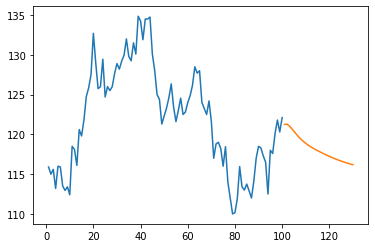

In [40]:
plt.plot(new_plot, scaler.inverse_transform(open_values_scaled[1935:]))
plt.plot(pred_plot, scaler.inverse_transform(lst_output))

In [41]:
new_open_values = open_values_scaled.tolist()

In [42]:
len(new_open_values)

2035

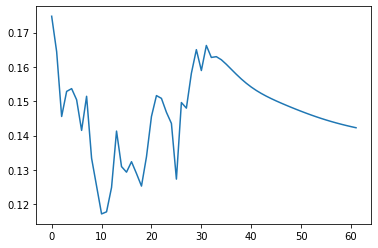

In [43]:
# Entends helps us to fill the missing value with approx value
new_open_values.extend(lst_output)
plt.plot(new_open_values[2003:])

In [44]:
final_graph = scaler.inverse_transform(new_open_values).tolist()

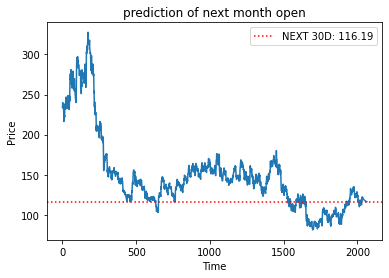

In [45]:
# Plotting final results with predicted value after 30 Days

plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("prediction of next month open")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()